# Orbits for the original Collatz function

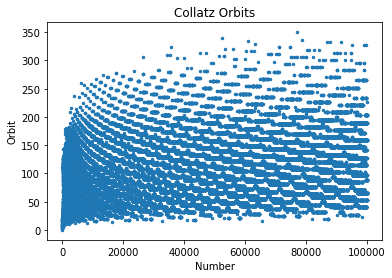

In [3]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd
x = []
y = []
for i in range(0,100000):
    cycle = []
    count = 1
    num = i+1
    if num == 1: 
        cycle.append(num)
        y.append(0)
        x.append(1)
    else:
        while num>1:
            if num in cycle:
                break
            else:
                cycle.append(num)
                count = count + 1
                if num % 2 == 0:
                    num= num/2
                else:
                    num = 3*num+1
        y.append(len(cycle))
        x.append(i+1)
data = {'Number':x,'Orbit':y}
df = pd.DataFrame(data)
plt.scatter(x,y,s=6)
plt.title("Collatz Orbits")
plt.xlabel("Number")
plt.ylabel("Orbit")
plt.show()

In [3]:
orbitDF = pd.DataFrame(data)
len(orbitDF['Orbit'].unique())
orbitDF

,Number,Orbit
0,1,0
1,2,1
2,3,7
3,4,2
4,5,5
...,...,...
99995,99996,89
99996,99997,89
99997,99998,89
99998,99999,226


# Variant Collatz functions where constant is a power of 3

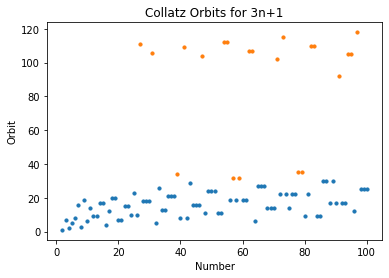

31.737373737373737


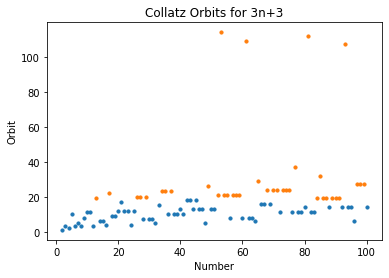

18.424242424242426


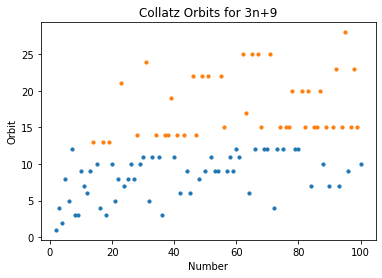

12.343434343434344


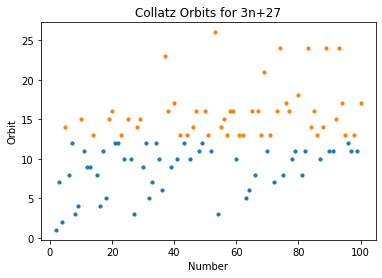

12.242424242424242


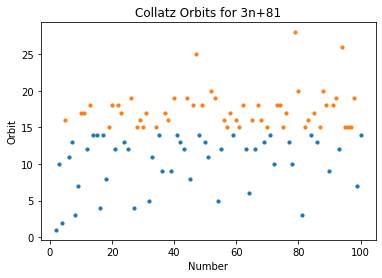

14.04040404040404


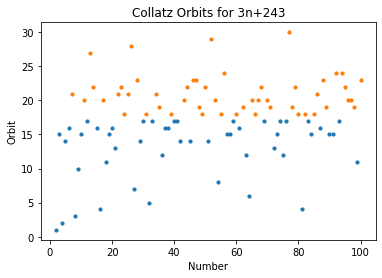

17.08080808080808


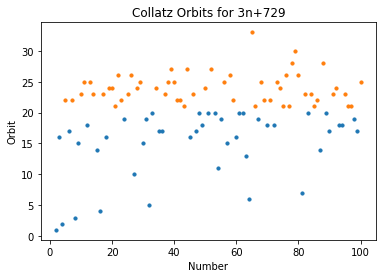

20.03030303030303


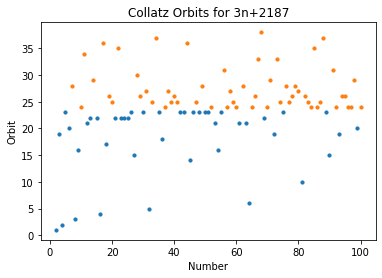

23.505050505050505


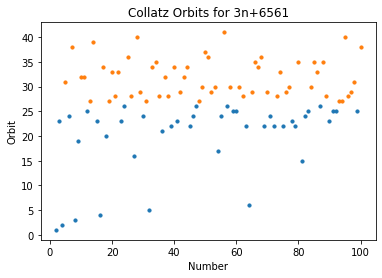

26.87878787878788


In [5]:
import numpy as np
import matplotlib.pyplot as plt

for j in range(1,10):
    x = []
    y = []
    constant = 3**(j-1)
    for i in range(1,100):
        cycle = []
        count = 1
        num = i+1
        if num == 1: 
            cycle.append(num)
        else:
            while num>1:
                if num in cycle:
                    break
                else:
                    cycle.append(num)
                    count = count + 1
                    if num % 2 == 0:
                        num= num/2
                    else:
                        num = 3*num + constant
            y.append(len(cycle))
            x.append(i+1)
            data = {'Number':x,'Orbit':y}
            df = pd.DataFrame(data)
            avg = np.mean(y)
            low = df[df['Orbit']<avg]
            high = df[df['Orbit']>avg]
    plt.scatter(low['Number'],low['Orbit'],s=10)
    plt.scatter(high['Number'],high['Orbit'],s=10)
    plt.title("Collatz Orbits for 3n+" + str(constant))
    plt.xlabel("Number")
    plt.ylabel("Orbit")
    plt.show()
    print(avg)

# Patterns in Collatz

(3333, 2)


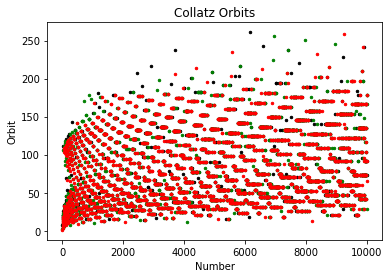

In [8]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd
x = []
y = []
for i in range(1,10000):
    cycle = []
    count = 1
    num = i+1
    if num == 1: 
        cycle.append(num)
        y.append(0)
        x.append(1)
    else:
        while num>1:
            if num in cycle:
                break
            else:
                cycle.append(num)
                count = count + 1
                if num % 2 == 0:
                    num= num/2
                else:
                    num = 3*num+1
        y.append(len(cycle))
        x.append(i+1)
#     print(cycle)
data = {'Number':x,'Orbit':y}
avg = np.mean(y)
std = np.std(y)
# print(avg)
df = pd.DataFrame(data)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df)
# a = 0.25
# below_avg = df[df['Orbit']<avg-a*std]
# above_avg = df[df['Orbit']>avg+a*std]
# The bit-set of n & the bit-set of (n-1) result in zero bits.
power_2 = df[(df['Number']&df['Number']-1)==0]
mult_3 = df[df['Number']%3==0]
avg_mult_3 = np.mean(mult_3['Orbit'])
one_mod_3 = df[df['Number']%3==1]
avg_one_mod_3 = np.mean(one_mod_3['Orbit'])
two_mod_3 = df[df['Number']%3==2]
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(two_mod_3)
avg_two_mod_3 = np.mean(two_mod_3['Orbit'])
print(np.shape(mult_3))
# plt.scatter(below_avg['Number'],below_avg['Orbit'],color='r',s=10)
# plt.scatter(above_avg['Number'],above_avg['Orbit'],color='b',s=10)
# plt.scatter(x,y,s=6)
plt.scatter(mult_3['Number'],mult_3['Orbit'],color='k',s=6)
plt.scatter(one_mod_3['Number'],one_mod_3['Orbit'],color='g',s=6)
plt.scatter(two_mod_3['Number'],two_mod_3['Orbit'],color='r',s=6)
plt.title("Collatz Orbits")
plt.xlabel("Number")
plt.ylabel("Orbit")
# plt.ylim(80,120)
plt.show()

# Data Structure for Collatz

In [9]:
from scipy import spatial
x = []
y = []
for i in range(1,1000):
    cycle = []
    count = 1
    num = i+1
    if num == 1: 
        cycle.append(num)
        y.append(0)
        x.append(1)
    else:
        while num>1:
            if num in cycle:
                break
            else:
                cycle.append(num)
                count = count + 1
                if num % 2 == 0:
                    num= num/2
                else:
                    num = 3*num+1
        y.append(len(cycle))
        x.append(i+1)
data = {'Number':x,'Orbit':y}
df = pd.DataFrame(data)
tree = spatial.KDTree(df)
nbrs = tree.query_ball_tree(tree,1)
tuple = [nbr for nbr in nbrs if len(nbr)<=5]
utuple = np.unique(tuple)
print(utuple)
# plt.scatter(x,y,s=6)
# plt.title("Collatz Orbits")
# print(df)
# plt.xlabel("Number")
# plt.ylabel("Orbit")
# plt.show()

[list([0]) list([1]) list([2]) list([3]) list([4]) list([5]) list([6])
 list([7]) list([8]) list([9]) list([10, 11]) list([12, 13]) list([14])
 list([15]) list([16, 17]) list([18, 19]) list([20, 21]) list([22])
 list([23]) list([24]) list([25]) list([26, 27]) list([26, 27, 28])
 list([27, 28]) list([29]) list([30]) list([31]) list([32, 33])
 list([34, 35]) list([34, 35, 36]) list([35, 36]) list([37]) list([38])
 list([39]) list([40]) list([41]) list([42, 43]) list([42, 43, 44])
 list([43, 44]) list([45]) list([46]) list([47, 48]) list([47, 48, 49])
 list([48, 49]) list([50, 51]) list([52, 53]) list([54]) list([55])
 list([56]) list([57]) list([58, 59]) list([60, 61]) list([62])
 list([63, 64]) list([63, 64, 65]) list([64, 65]) list([66, 67])
 list([66, 67, 68]) list([67, 68]) list([69]) list([70]) list([71])
 list([72]) list([73]) list([74, 75]) list([76, 77]) list([78]) list([79])
 list([80, 81]) list([82, 83]) list([84, 85]) list([86]) list([87])
 list([88]) list([89]) list([90, 91])